In [ ]:
# !conda install pandas-datareader yfinance

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [6]:
import yfinance as yf
data = yf.download("MSFT AAPL", start="2021-03-30", end="2022-03-30")

[*********************100%***********************]  2 of 2 completed


In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.head()

Adj Close                   Close                    High  \
                  AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2021-03-29  120.672775  233.339355  121.389999  235.240005  122.580002   
2021-03-30  119.191582  229.976746  119.900002  231.850006  120.400002   
2021-03-31  121.428291  233.865067  122.150002  235.770004  123.519997   
2021-04-01  122.273270  240.391907  123.000000  242.350006  124.180000   
2021-04-05  125.156136  247.057617  125.900002  249.070007  126.160004   

                               Low                    Open              \
                  MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
2021-03-29  236.800003  120.730003  231.880005  121.650002  236.589996   
2021-03-30  233.850006  118.860001  231.100006  120.110001  233.529999   
2021-03-31  239.100006  121.150002  232.389999  121.650002  232.910004   
2021-04-01  242.839996  122.489998  238.050003  123.660004  238.470001   
2021-04-05  249.960007  123.070000  242.699997  123.870003  242.759995   

               Volume            
                 AAPL      MSFT  
Date                             
2021-03-29   80819200  25227500  
2021-03-30   85671900  24792000  
2021-03-31  118323800  43623500  
2021-04-01   75089100  30338000  
2021-04-05   88651200  36910600

In [9]:
data.tail()

Adj Close                   Close                    High  \
                  AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2022-03-23  170.210007  299.489990  170.210007  299.489990  172.639999   
2022-03-24  174.070007  304.100006  174.070007  304.100006  174.139999   
2022-03-25  174.720001  303.679993  174.720001  303.679993  175.279999   
2022-03-28  175.600006  310.700012  175.600006  310.700012  175.729996   
2022-03-29  178.960007  315.410004  178.960007  315.410004  179.009995   

                               Low                    Open              \
                  MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
2022-03-23  303.230011  167.649994  297.720001  167.990005  300.510010   
2022-03-24  304.200012  170.210007  298.320007  171.059998  299.140015   
2022-03-25  305.500000  172.750000  299.290009  173.880005  305.230011   
2022-03-28  310.799988  172.000000  304.329987  172.169998  304.329987   
2022-03-29  315.820007  176.339996  309.049988  176.690002  313.910004   

               Volume            
                 AAPL      MSFT  
Date                             
2022-03-23   98062700  25715400  
2022-03-24   90131400  24484500  
2022-03-25   80470700  22550600  
2022-03-28   90371900  29578200  
2022-03-29  100589400  30393400

In [10]:
data.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT')],
           )

In [11]:
data[('High','AAPL')].mean()  # Значение колонки передаем в виде кортежа

151.57448848213735

In [12]:
data[('Close','AAPL')].cov(data[('Close','MSFT')])

378.5444469173369

In [13]:
data[('Close','AAPL')].corr(data[('Close','MSFT')])

0.8120607006314169

In [14]:
data[[('Close','MSFT'), ('Close','AAPL')]].to_csv('arch_share.csv')

In [15]:
data_act = pd.read_csv('arch_share.csv', index_col=0 , parse_dates=[0], skiprows=[0,2])
data_act.head()

,MSFT,AAPL
2021-03-29,235.240005,121.389999
2021-03-30,231.850006,119.900002
2021-03-31,235.770004,122.150002
2021-04-01,242.350006,123.000000
2021-04-05,249.070007,125.900002


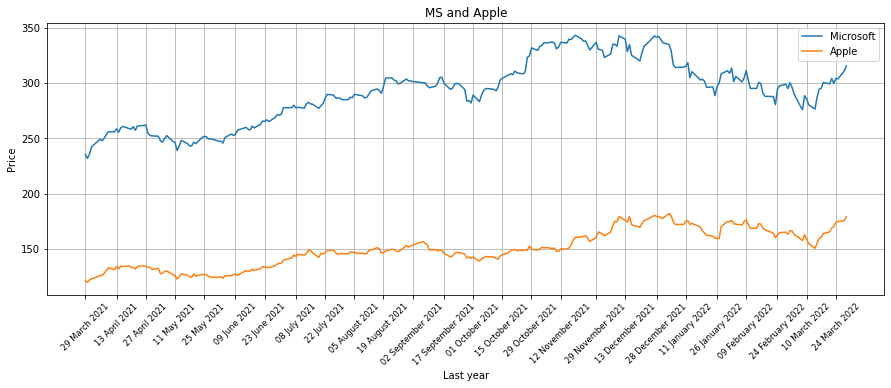

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))

ticks_to_use = data_act.index[::10]
labels = [i.strftime("%d %B %Y") for i in ticks_to_use]
ax.set_xticks(ticks_to_use)

# Названия тиков
ax.set_xticklabels(labels, rotation=45, fontsize='small')
ax.plot(data_act.index, data_act.MSFT, label='Microsoft')
ax.plot(data_act.index, data_act.AAPL, label='Apple')
ax.set_xlabel('Last year')
ax.set_ylabel('Price')
ax.set_title('MS and Apple')
ax.legend(loc="best")
ax.grid();

In [17]:
# Скачиваем данные с Yahoo, используя библиотеку pandas_datareader
df = pdr.get_data_yahoo("TSLA", start="2021-03-30", end="2022-03-30")  # TSLA

In [18]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,839.572477,802.932442,821.313819,821.941454,2.545967e+07,821.941454
std,180.307366,166.142080,174.173329,173.494005,9.166790e+06,173.494005
min,566.210022,546.979980,552.549988,563.460022,9.800600e+06,563.460022
25%,692.517487,668.775009,680.835007,679.100021,1.896752e+07,679.100021
50%,787.894989,756.304993,774.195007,774.804993,2.378030e+07,774.804993
75%,993.157486,926.649994,951.955002,954.857513,3.032400e+07,954.857513
max,1243.489990,1217.000000,1234.410034,1229.910034,6.285210e+07,1229.910034


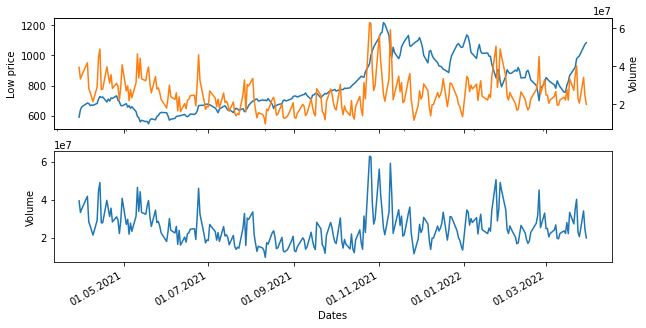

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
df.Low.plot(ax=axes[0])
# дополнительная ось со значениями давления на оси Y справа
df.Volume.plot(ax=axes[1], sharex=True)

ax_add = df.Volume.plot(ax=axes[0], secondary_y=True)

axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))

axes[0].set_ylabel('Low price')
ax_add.set_ylabel('Volume')
axes[1].set_ylabel('Volume')
axes[1].set_xlabel('Dates');

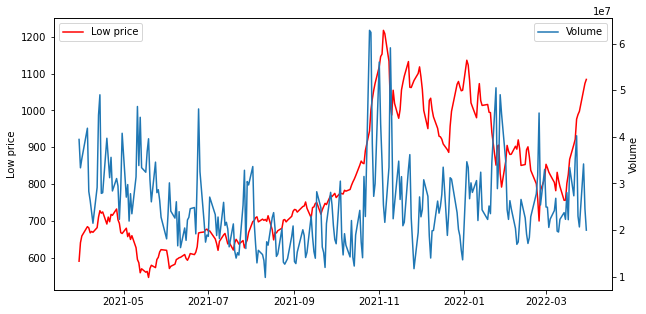

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(df.index, df.Low, 'r', label='Low price')
ax2 = ax1.twinx()  # Создаю вторую ось
ax2.plot(df.index, df.Volume, label='Volume')
ax1.set_ylabel('Low price')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Dates')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right');